In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deneyim/Submission_Experiment1.xlsx
/kaggle/input/experimental-dataset/Submission_Experiment.xlsx
/kaggle/input/tic-tac-toe-synthetic-data/Grup.xlsx


**Empty cells, that is, cells that have not been changed, are expressed as 0, cells with X changed as 1, and cells with O changed as 2.**

Epoch 1/3
25000/25000 [==============================] - 57s 2ms/step - loss: 0.5611 - accuracy: 0.8481 - val_loss: 0.1161 - val_accuracy: 1.0000
Epoch 2/3
25000/25000 [==============================] - 60s 2ms/step - loss: 0.2749 - accuracy: 0.9372 - val_loss: 0.0892 - val_accuracy: 1.0000
Epoch 3/3
25000/25000 [==============================] - 61s 2ms/step - loss: 0.2332 - accuracy: 0.9465 - val_loss: 0.0786 - val_accuracy: 1.0000


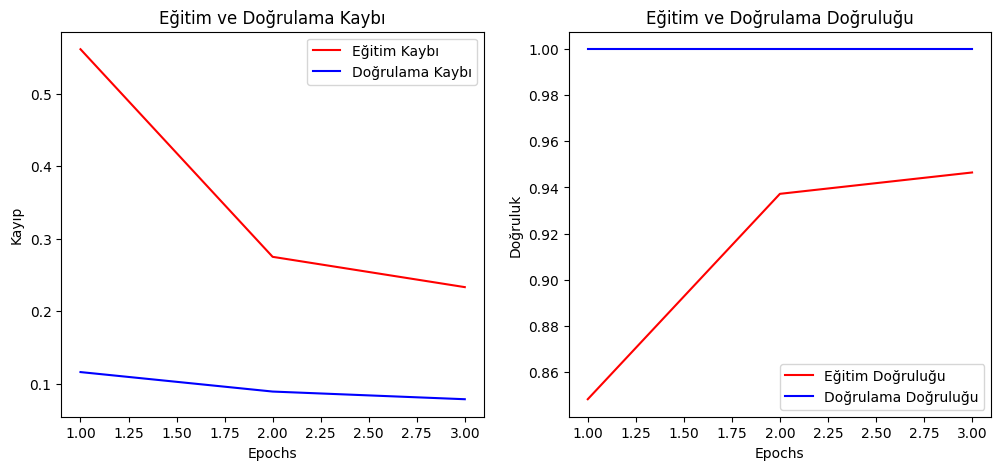

6250/6250 [==============================] - 7s 1ms/step
Doğruluk: 1.0
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6569
           1       1.00      1.00      1.00     12678
           2       1.00      1.00      1.00      6482
           3       1.00      1.00      1.00     13479
           4       1.00      1.00      1.00      9600
           5       1.00      1.00      1.00     18918
           6       1.00      1.00      1.00      6367
           7       1.00      1.00      1.00     13716
           8       1.00      1.00      1.00      9406
           9       1.00      1.00      1.00     19198
          10       1.00      1.00      1.00      6468
          11       1.00      1.00      1.00     13603
          12       1.00      1.00      1.00      6480
          13       1.00      1.00      1.00     12560
          14       1.00      1.00      1.00      6365
          15       1.00      1.00      1.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

# Veri setini yükleme
data = pd.read_excel("/kaggle/input/tic-tac-toe-synthetic-data/Grup.xlsx")

# Etiketleri ve özellikleri ayırma
X = data.iloc[:, 0:9].values  
y = data['Winner'].values

# Verileri eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Etiketleri kodlama
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Yeni modeli oluşturma
model = Sequential([
    Dense(64, activation='relu', input_shape=(9,), kernel_regularizer=regularizers.l2(0.001)),  # L2 regülarizasyonu eklendi
    Dropout(0.3),  # Dropout katmanı eklendi (Dropout oranı düşürüldü)
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # L2 regülarizasyonu eklendi
    Dropout(0.2),  # Dropout katmanı eklendi (Dropout oranı düşürüldü)
    Dense(17, activation='softmax')
])

# Modeli derleme
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eğitme
history = model.fit(X_train_scaled, y_train_encoded, epochs=3, batch_size=32, validation_data=(X_test_scaled, y_test_encoded), verbose=1)

# Eğitim ve doğrulama kayıp değerlerini al
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Eğitim ve doğrulama doğruluk değerlerini al
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Grafiği çizme
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))

# Kayıp grafiği
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Eğitim Kaybı')
plt.plot(epochs, val_loss, 'b', label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Eğitim Doğruluğu')
plt.plot(epochs, val_accuracy, 'b', label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()

# Eğitilmiş modelle test setini değerlendirme
y_pred_prob = model.predict(X_test_scaled)
y_pred = y_pred_prob.argmax(axis=-1)

# Doğruluk ve sınıflandırma raporu
accuracy = accuracy_score(y_test_encoded, y_pred)
report = classification_report(y_test_encoded, y_pred)

print("Doğruluk:", accuracy)
print("Sınıflandırma Raporu:\n", report)


In [13]:
import pandas as pd

# Yeni veriyi yükleme
data1 = pd.read_excel("/kaggle/input/experimental-dataset/Submission_Experiment.xlsx")
yeni_veri = data1.iloc[:,0:9]

# Yeni verileri ölçeklendirme
yeni_veri_scaled = scaler.transform(yeni_veri)

# Modeli kullanarak tahminler yapma
tahminler_prob = model.predict(yeni_veri_scaled)
tahminler = tahminler_prob.argmax(axis=-1)

# Tahmin edilen sınıfları orijinal etiketlere dönüştürme
tahminler_etiketler = label_encoder.inverse_transform(tahminler)
print(tahminler_etiketler)


4/4 [==============================] - 0s 2ms/step
['369WinnerO' '369WinnerX' '369WinnerO' '357WinnerX' '789WinnerX'
 '159WinnerO' 'Draw' '789WinnerO' '258WinnerX' '159WinnerX' '159WinnerO'
 '456WinnerO' '789WinnerX' '147WinnerO' '147WinnerX' '159WinnerX'
 '456WinnerX' 'Draw' '258WinnerX' '369WinnerX' '147WinnerX' '258WinnerO'
 '258WinnerO' '123WinnerX' '258WinnerX' '159WinnerO' '147WinnerX' 'Draw'
 '456WinnerX' '123WinnerX' '159WinnerX' '147WinnerO' '369WinnerX'
 '357WinnerX' '258WinnerO' '789WinnerX' '357WinnerX' '456WinnerX'
 '159WinnerX' '159WinnerX' '159WinnerX' '357WinnerO' '123WinnerX'
 '357WinnerO' '123WinnerO' '258WinnerX' 'Draw' '369WinnerX' '369WinnerO'
 'Draw' '159WinnerO' 'Draw' '147WinnerO' '159WinnerO' '456WinnerX'
 '159WinnerX' '258WinnerX' '159WinnerO' '159WinnerO' '369WinnerO'
 '369WinnerX' '123WinnerX' '258WinnerO' 'Draw' '789WinnerX' '258WinnerX'
 '357WinnerO' '159WinnerX' '159WinnerX' '159WinnerX' '789WinnerX'
 '369WinnerO' 'Draw' '159WinnerO' '369WinnerO' '159Winn

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [14]:
print("Yeni Veri İçin Tahminler:")
print(tahminler_etiketler)
yeni_veri["Winner1"]=tahminler_etiketler.transpose()
yeni_veri.to_excel("Deneme3.xlsx")

Yeni Veri İçin Tahminler:
['369WinnerO' '369WinnerX' '369WinnerO' '357WinnerX' '789WinnerX'
 '159WinnerO' 'Draw' '789WinnerO' '258WinnerX' '159WinnerX' '159WinnerO'
 '456WinnerO' '789WinnerX' '147WinnerO' '147WinnerX' '159WinnerX'
 '456WinnerX' 'Draw' '258WinnerX' '369WinnerX' '147WinnerX' '258WinnerO'
 '258WinnerO' '123WinnerX' '258WinnerX' '159WinnerO' '147WinnerX' 'Draw'
 '456WinnerX' '123WinnerX' '159WinnerX' '147WinnerO' '369WinnerX'
 '357WinnerX' '258WinnerO' '789WinnerX' '357WinnerX' '456WinnerX'
 '159WinnerX' '159WinnerX' '159WinnerX' '357WinnerO' '123WinnerX'
 '357WinnerO' '123WinnerO' '258WinnerX' 'Draw' '369WinnerX' '369WinnerO'
 'Draw' '159WinnerO' 'Draw' '147WinnerO' '159WinnerO' '456WinnerX'
 '159WinnerX' '258WinnerX' '159WinnerO' '159WinnerO' '369WinnerO'
 '369WinnerX' '123WinnerX' '258WinnerO' 'Draw' '789WinnerX' '258WinnerX'
 '357WinnerO' '159WinnerX' '159WinnerX' '159WinnerX' '789WinnerX'
 '369WinnerO' 'Draw' '159WinnerO' '369WinnerO' '159WinnerX' '456WinnerX'
 '123Wi

/tmp/ipykernel_33/238603888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yeni_veri["Winner1"]=tahminler_etiketler.transpose()


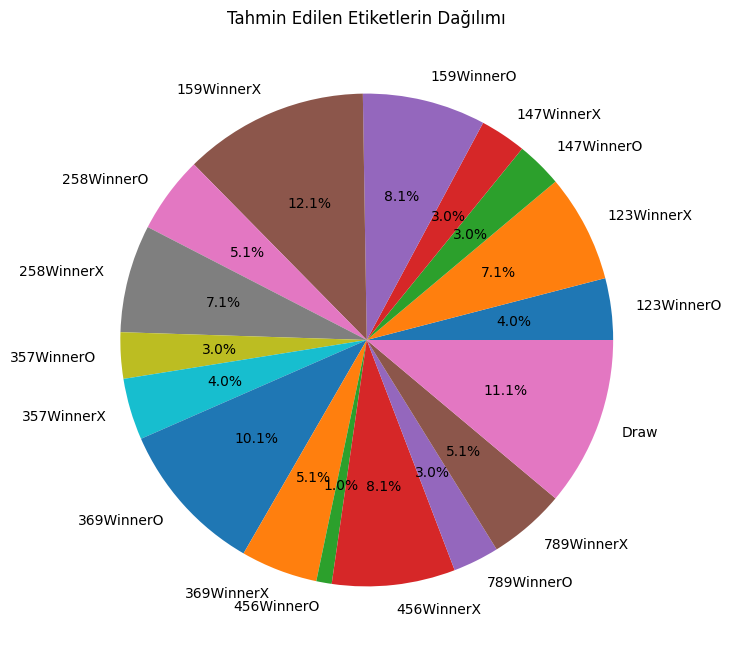

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# NumPy dizisindeki benzersiz değerleri ve tekrarlarını hesapla
benzersiz_degerler, tekrar_sayilari = np.unique(tahminler_etiketler, return_counts=True)

# Pasta grafiği oluştur
plt.figure(figsize=(8, 8))
plt.pie(tekrar_sayilari, labels=benzersiz_degerler, autopct='%1.1f%%')
plt.title('Tahmin Edilen Etiketlerin Dağılımı')
plt.show()
